In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [4]:
#import the data 
df=pd.read_csv("shopping_trends_updated (1).csv")
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [5]:
#Display the top five
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [6]:
#target variable
df['Discount Applied'].unique()

array(['Yes', 'No'], dtype=object)

In [7]:
#Swap last column with the target variable
col="Discount Applied"
cols=list(df.columns)
index=cols.index(col)
cols[index],cols[-1]=cols[-1],cols[index]

df=df[cols]
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Frequency of Purchases,Promo Code Used,Previous Purchases,Payment Method,Discount Applied
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Fortnightly,Yes,14,Venmo,Yes
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Fortnightly,Yes,2,Cash,Yes
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Weekly,Yes,23,Credit Card,Yes
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Weekly,Yes,49,PayPal,Yes
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Annually,Yes,31,PayPal,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,Weekly,No,32,Venmo,No
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,Bi-Weekly,No,41,Bank Transfer,No
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,Quarterly,No,24,Venmo,No
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,Weekly,No,24,Venmo,No


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Frequency of Purchases  3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [9]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [10]:
df.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Frequency of Purchases    0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Discount Applied          0
dtype: int64

INSIGHTS:


Swapping the targeting variables because having more than three values isnt ideal also the dataset has no missing values and is clean and ready for analysis


In [11]:
#Exploring data: Splitting numerical and categorical variables and getting their count
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']
numerical_len=len(numerical_features)

categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']
categorical_len=len(categorical_features)

print(f"We have {numerical_len} numerical features and they are: {numerical_features}")
print(f"we have {categorical_len} categorical features and they are: {categorical_features}")

We have 5 numerical features and they are: ['Customer ID', 'Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
we have 13 categorical features and they are: ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Shipping Type', 'Frequency of Purchases', 'Promo Code Used', 'Payment Method', 'Discount Applied']


In [12]:
#Getting the proportion of each variable to find out which attribute is relevant to use in analysis(Categorical)
for col in categorical_features:
    print(df[col].value_counts(normalize=True)*100)

Gender
Male      68.0
Female    32.0
Name: proportion, dtype: float64
Item Purchased
Blouse        4.384615
Jewelry       4.384615
Pants         4.384615
Shirt         4.333333
Dress         4.256410
Sweater       4.205128
Jacket        4.179487
Belt          4.128205
Sunglasses    4.128205
Coat          4.128205
Sandals       4.102564
Socks         4.076923
Skirt         4.051282
Shorts        4.025641
Scarf         4.025641
Hat           3.948718
Handbag       3.923077
Hoodie        3.871795
Shoes         3.846154
T-shirt       3.769231
Sneakers      3.717949
Boots         3.692308
Backpack      3.666667
Gloves        3.589744
Jeans         3.179487
Name: proportion, dtype: float64
Category
Clothing       44.538462
Accessories    31.794872
Footwear       15.358974
Outerwear       8.307692
Name: proportion, dtype: float64
Location
Montana           2.461538
California        2.435897
Idaho             2.384615
Illinois          2.358974
Alabama           2.282051
Minnesota         2.2

In [12]:
##Proportion of numerical
for col in numerical_features:
    print(df[col].value_counts(normalize=True)*100)

Customer ID
1       0.025641
2621    0.025641
2593    0.025641
2594    0.025641
2595    0.025641
          ...   
1305    0.025641
1306    0.025641
1307    0.025641
1308    0.025641
3900    0.025641
Name: proportion, Length: 3900, dtype: float64
Age
69    2.256410
57    2.230769
41    2.205128
25    2.179487
49    2.153846
50    2.128205
54    2.128205
27    2.128205
62    2.128205
32    2.102564
19    2.076923
58    2.076923
42    2.051282
43    2.025641
28    2.025641
31    2.025641
37    1.974359
46    1.948718
29    1.948718
68    1.923077
59    1.923077
63    1.923077
56    1.897436
36    1.897436
55    1.871795
52    1.871795
64    1.871795
35    1.846154
51    1.846154
65    1.846154
40    1.846154
45    1.846154
47    1.820513
66    1.820513
30    1.820513
23    1.820513
38    1.794872
53    1.794872
18    1.769231
21    1.769231
26    1.769231
34    1.743590
48    1.743590
24    1.743590
39    1.743590
70    1.717949
22    1.692308
61    1.666667
60    1.666667
33    1.615385


INSIGHTS


THE ABOVE PROVIDED PROPORTIONS CLEARLY SHOW CUSTOMER ID ISNT REVELANT FOR ANALYSIS SINCE EACH VALUE IS UNIQUE.
WE CAN KEEP THE REST OF THE COLUMNS FOR OUR ANALYSIS.

UBIVARIATE ANALYSIS OF NUMERICAL DATA

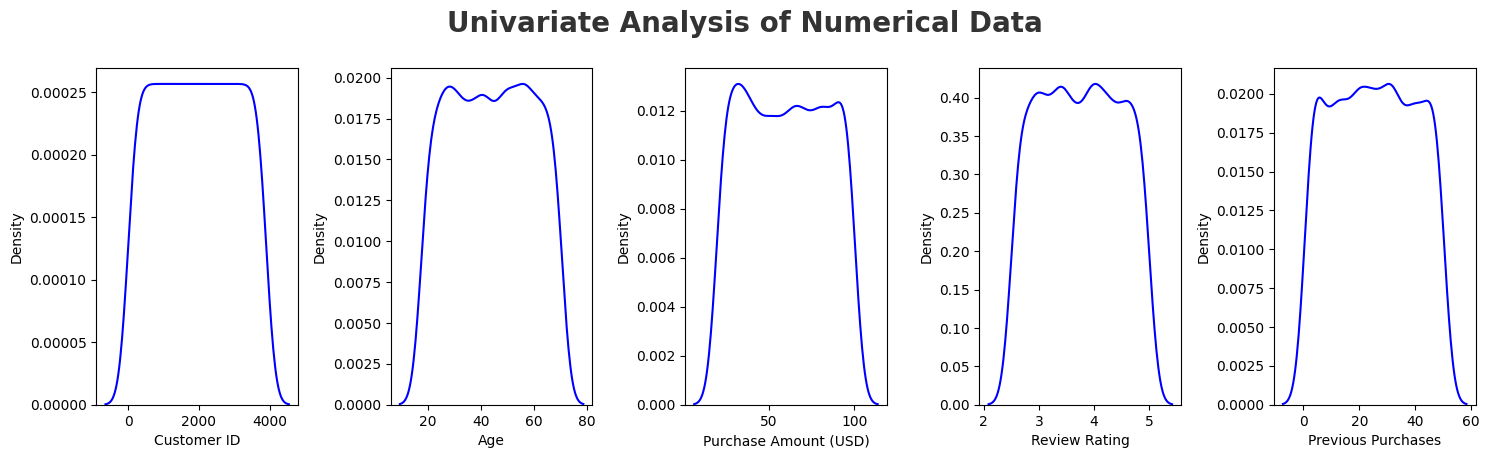

In [13]:
plt.figure(figsize=(15,12))
plt.suptitle('Univariate Analysis of Numerical Data',fontsize=20,fontweight='bold',alpha=0.8,y=1)

for i in range(0,len(numerical_features)):
    plt.subplot(3,5,i+1)
    sns.kdeplot(x=df[numerical_features[i]],color='Blue')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

UNVARIATE ANALYSIS OF CATEGORICAL FEATURES

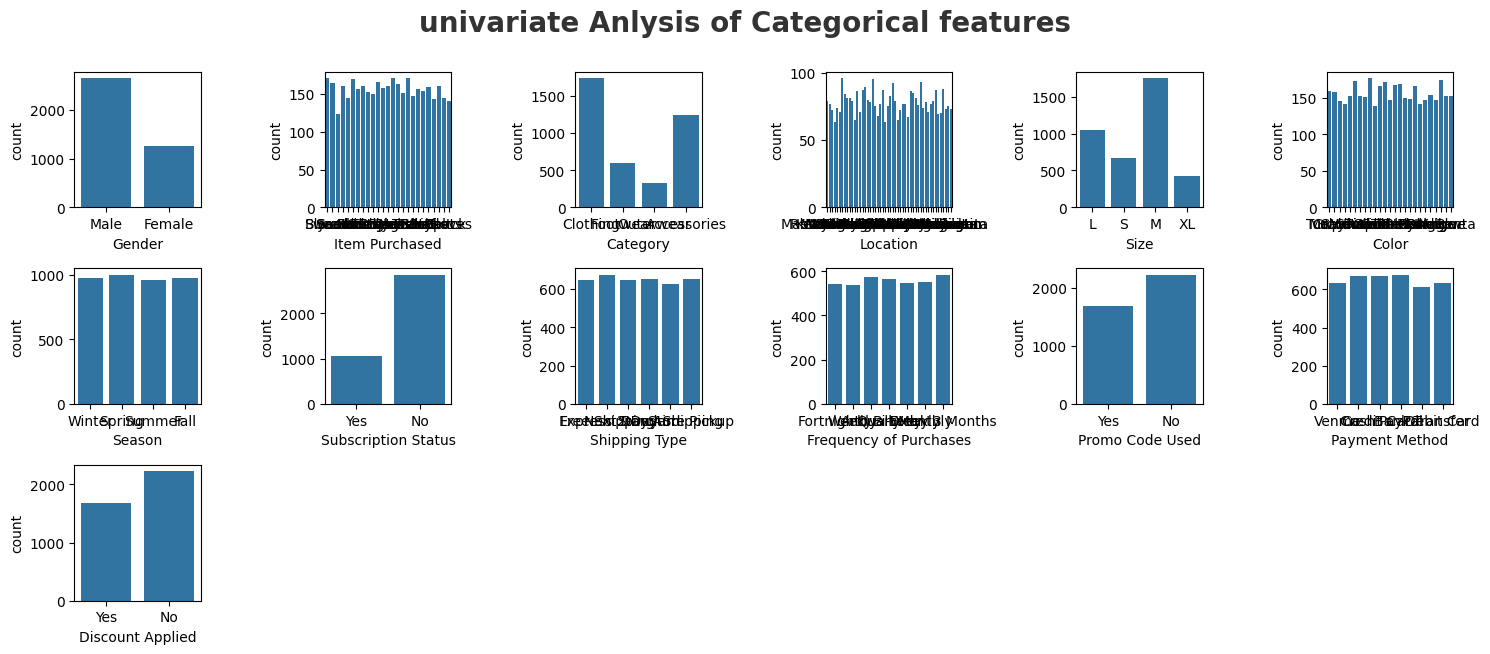

In [14]:
categorical_features = list(df.select_dtypes(include='object').columns)
if 'Customer ID' in categorical_features: 
    categorical_features.remove('Customer ID')
plt.figure(figsize=(15,10))
plt.suptitle('univariate Anlysis of Categorical features',fontsize=20,fontweight='bold',alpha=0.8,y=1.)
for i in range(0,len(categorical_features)):
    plt.subplot(5,6,i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

In [16]:
#Multivariate Analysis
discrete_features=[feature for feature in numerical_features if len(df[feature].unique())<=25]
discrete_len=len(discrete_features)

continous_features=[feature for feature in numerical_features if len(df[feature].unique())>25]
con_len=len(continous_features)

print(f"We have {discrete_len} discrete features: {discrete_features}")
print(f"We have {con_len} contineous features: {continous_features}")

We have 0 discrete features: []
We have 5 contineous features: ['Customer ID', 'Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']


INSIGHTS

THE REASON WHY CUSTOMER ID WAS NOT INCLUDED IS BECAUSE EVERY VALUE IS UNIQUE SO IT WOULDN'T MAKE SENSE TO KEEP IT.

In [ ]:
#PERFORMING THE CHI-2 TEST TO CHECK FOR MULTICOLLINEARITY AND BUILDING A CONTINGENCY TABLE
#NULL HYPOTHESIS: THE FEATURE IS INDEPENDENT OF TARGET
#ALTERNATIVE HYPOTHESIS:tHE FEATURE IS DEPENDENT ON TARGET

In [15]:
from scipy.stats import chi2_contingency
chi=[]
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['Discount Applied'],df[feature]))[1]>0.05:
        chi.append("Reject Null Hypothesis")
    else:
        chi.append("Fail to Reject Null Hypothesis")
result=pd.DataFrame(data=[categorical_features,chi]).T
result.columns=['Columns','Hypthesis Result']
result

,Columns,Hypthesis Result
0,Gender,Fail to Reject Null Hypothesis
1,Item Purchased,Reject Null Hypothesis
2,Category,Reject Null Hypothesis
3,Location,Reject Null Hypothesis
4,Size,Reject Null Hypothesis
5,Color,Reject Null Hypothesis
6,Season,Reject Null Hypothesis
7,Subscription Status,Fail to Reject Null Hypothesis
8,Shipping Type,Reject Null Hypothesis
9,Frequency of Purchases,Reject Null Hypothesis


IndexError: index 3 is out of bounds for axis 0 with size 3

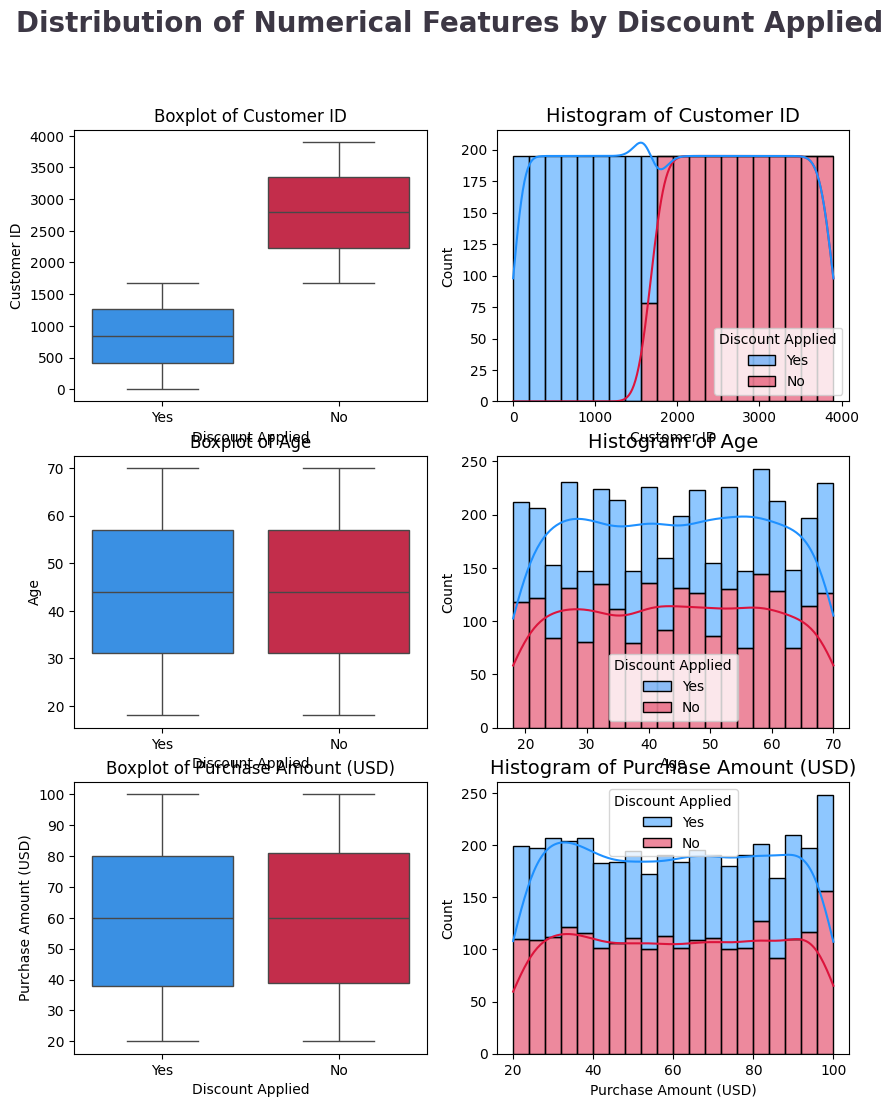

In [26]:
clr1=["#1E90FF","#DC143C"]
fig,ax=plt.subplots(3,2,figsize=(10,12))
fig.suptitle('Distribution of Numerical Features by Discount Applied',color='#3C3744',fontsize=20,fontweight='bold',ha='center')

for i,col in enumerate(continous_features):
    sns.boxplot(data=df,x='Discount Applied',y=col,palette=clr1,ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}',fontsize=12)
    sns.histplot(data=df,x=col,hue='Discount Applied',bins=20,kde=True,multiple='stack',palette=clr1,ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}',fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.show() # to check for outliers is why boxplot is used

<Figure size 1200x1000 with 0 Axes>

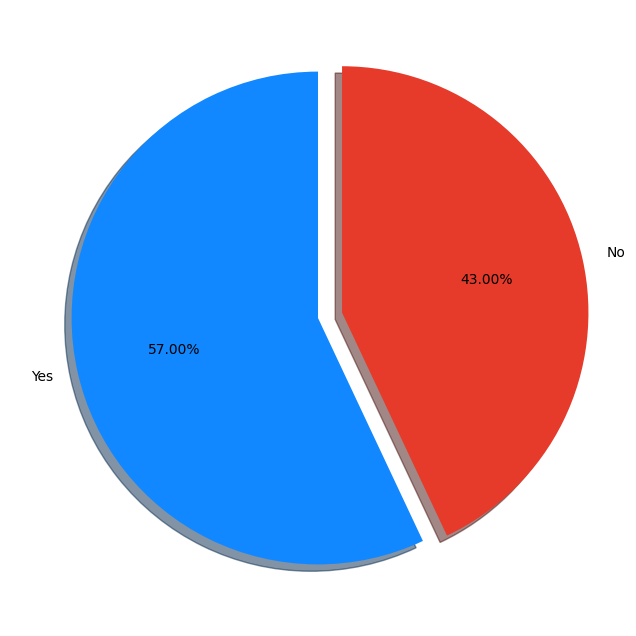

In [29]:
percentage=df['Discount Applied'].value_counts(normalize=True)*100
labels=['Yes','No']
plt.figure(figsize=(12,10))
plt.suptitle("Pie chart Displaying the discount applied percentages",fontsize=20,fontweight=12,alpha=0.8)

fig,ax=plt.subplots(figsize=(15,8))
explode=(0,0.1)
colors=['#1188ff','#e63a2a']
ax.pie(percentage,labels=labels,explode=explode,colors=colors,startangle=90,autopct="%1.2f%%",shadow=True)
plt.show()

In [34]:

#group data by Loaction and their count in the form of Discount Applied
df.groupby('Location')['Discount Applied'].value_counts(normalize=True).to_frame().head(50)

proportion
Location      Discount Applied            
Alabama       No                  0.595506
              Yes                 0.404494
Alaska        No                  0.597222
              Yes                 0.402778
Arizona       No                  0.661538
              Yes                 0.338462
Arkansas      No                  0.531646
              Yes                 0.468354
California    No                  0.578947
              Yes                 0.421053
Colorado      No                  0.586667
              Yes                 0.413333
Connecticut   No                  0.666667
              Yes                 0.333333
Delaware      No                  0.546512
              Yes                 0.453488
Florida       No                  0.544118
              Yes                 0.455882
Georgia       No                  0.594937
              Yes                 0.405063
Hawaii        No                  0.507692
              Yes                 0.492308
Idaho         No                  0.591398
              Yes                 0.408602
Illinois      No                  0.597826
              Yes                 0.402174
Indiana       Yes                 0.569620
              No                  0.430380
Iowa          Yes                 0.521739
              No                  0.478261
Kansas        No                  0.761905
              Yes                 0.238095
Kentucky      No                  0.569620
              Yes                 0.430380
Louisiana     No                  0.583333
              Yes                 0.416667
Maine         No                  0.649351
              Yes                 0.350649
Maryland      No                  0.558140
              Yes                 0.441860
Massachusetts No                  0.513889
              Yes                 0.486111
Michigan      No                  0.602740
              Yes                 0.397260
Minnesota     No                  0.556818
              Yes                 0.443182
Mississippi   No                  0.525000
              Yes                 0.475000
Missouri      No                  0.506173
              Yes                 0.493827

In [31]:
df['Location'].unique()

array(['Kentucky', 'Maine', 'Massachusetts', 'Rhode Island', 'Oregon',
       'Wyoming', 'Montana', 'Louisiana', 'West Virginia', 'Missouri',
       'Arkansas', 'Hawaii', 'Delaware', 'New Hampshire', 'New York',
       'Alabama', 'Mississippi', 'North Carolina', 'California',
       'Oklahoma', 'Florida', 'Texas', 'Nevada', 'Kansas', 'Colorado',
       'North Dakota', 'Illinois', 'Indiana', 'Arizona', 'Alaska',
       'Tennessee', 'Ohio', 'New Jersey', 'Maryland', 'Vermont',
       'New Mexico', 'South Carolina', 'Idaho', 'Pennsylvania',
       'Connecticut', 'Utah', 'Virginia', 'Georgia', 'Nebraska', 'Iowa',
       'South Dakota', 'Minnesota', 'Washington', 'Wisconsin', 'Michigan'],
      dtype=object)

In [35]:
df2 = df.copy()

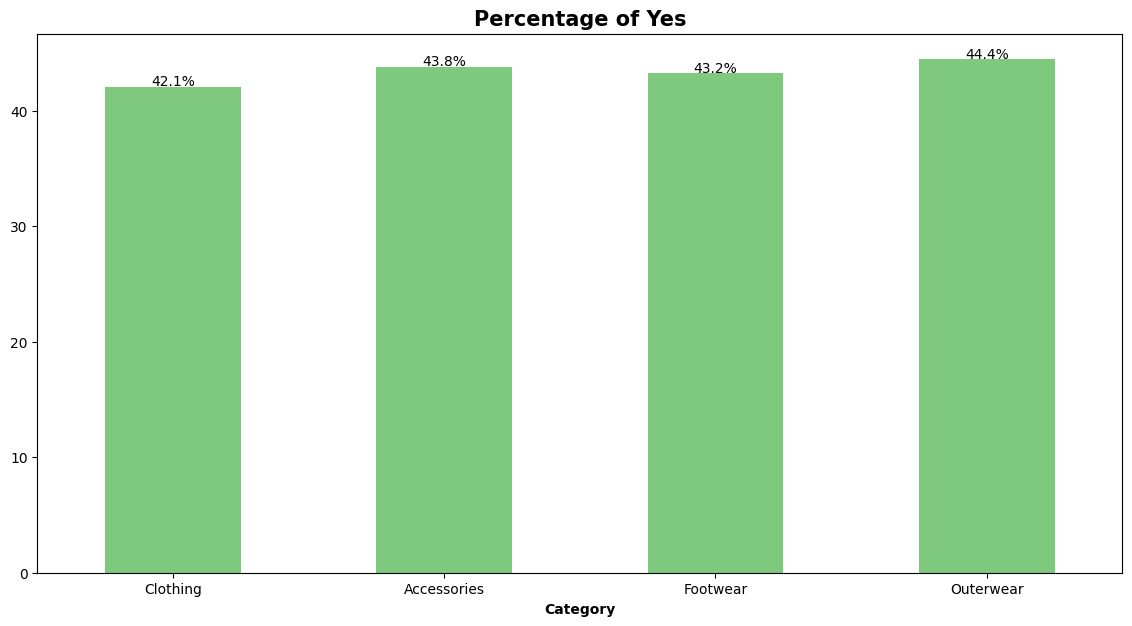

In [37]:
plt.figure(figsize=[14,7])

(100*df2[df2["Discount Applied"].isin(['Yes'])]['Category'].value_counts()/df2['Category'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Yes" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["Discount Applied"].isin(['Yes'])]['Category'].value_counts()/df2['Category'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Category' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

INSIGHTS


AS DEPICTED, OUTERWEAR HAD MORE CHANCES OF GETTING A DISCOUNT THAN OTHER CLOTHING CATEGORIES


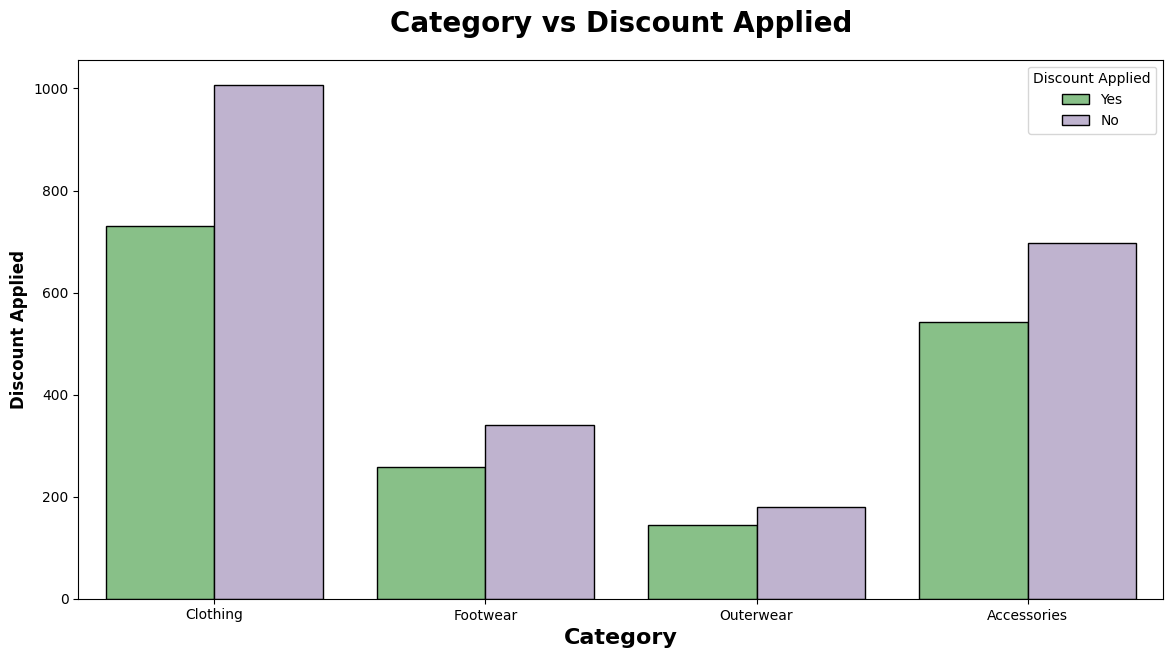

In [38]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Category",hue='Discount Applied',data=df,ec='black',palette="Accent")
plt.title("Category vs Discount Applied",weight='bold',fontsize=20,pad=20)
plt.xlabel('Category',weight='bold',fontsize=16)
plt.ylabel('Discount Applied',weight='bold',fontsize=12)
plt.legend(title='Discount Applied',fancybox=True)
plt.show()